# Import Lib

In [ ]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier  
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Preprocessing Part 1

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Kuliah/Semester 6/ML_Malin_Machine Learning/Tugas/Tubes 1/kendaraan/kendaraan_train.csv")

In [ ]:
data

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
285826,285827,Wanita,23.0,1.0,4.0,1.0,< 1 Tahun,Tidak,25988.0,152.0,217.0,0
285827,285828,Wanita,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,44686.0,152.0,50.0,0
285828,285829,Wanita,23.0,1.0,50.0,1.0,< 1 Tahun,Tidak,49751.0,152.0,226.0,0
285829,285830,Pria,68.0,1.0,7.0,1.0,1-2 Tahun,Tidak,30503.0,124.0,270.0,0


In [ ]:
data.dtypes

id                     int64
Jenis_Kelamin         object
Umur                 float64
SIM                  float64
Kode_Daerah          float64
Sudah_Asuransi       float64
Umur_Kendaraan        object
Kendaraan_Rusak       object
Premi                float64
Kanal_Penjualan      float64
Lama_Berlangganan    float64
Tertarik               int64
dtype: object

In [ ]:
fitur_encode = ["Jenis_Kelamin", "Umur_Kendaraan", "Kendaraan_Rusak"] #Pemilihan fitur yang akan digunakan
labelencoder = LabelEncoder() #Menggunakan label encoder agar data menjadi machine readable

# Menggunakan label encoder kepada fitur yang sudah dipilih
data[fitur_encode] = data[fitur_encode].apply(lambda series: pd.Series(
    labelencoder.fit_transform(series[series.notnull()]),
    index = series[series.notnull()].index
  ))


In [ ]:
data.drop(["id"], axis=1, inplace=True) #Drop data yang tidak relevan

In [ ]:
data

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1.0,30.0,1.0,33.0,1.0,1.0,1.0,28029.0,152.0,97.0,0
1,0.0,48.0,1.0,39.0,0.0,2.0,0.0,25800.0,29.0,158.0,0
2,NaN,21.0,1.0,46.0,1.0,1.0,1.0,32733.0,160.0,119.0,0
3,1.0,58.0,1.0,48.0,0.0,0.0,1.0,2630.0,124.0,63.0,0
4,0.0,50.0,1.0,35.0,0.0,2.0,NaN,34857.0,88.0,194.0,0
...,...,...,...,...,...,...,...,...,...,...,...
285826,1.0,23.0,1.0,4.0,1.0,1.0,1.0,25988.0,152.0,217.0,0
285827,1.0,21.0,1.0,46.0,1.0,1.0,1.0,44686.0,152.0,50.0,0
285828,1.0,23.0,1.0,50.0,1.0,1.0,1.0,49751.0,152.0,226.0,0
285829,0.0,68.0,1.0,7.0,1.0,0.0,1.0,30503.0,124.0,270.0,0


In [ ]:
imputer = KNNImputer(n_neighbors=5) #KNN inputer digunakan untuk mencari nilai pengganti dari data yang null
data_nonull = pd.DataFrame(imputer.fit_transform(data),columns = data.columns) #Hilangkan data null menggunakan hasil perhitungan knn imputer

# Data Nonull

In [ ]:
# data_nonull.to_csv("/content/drive/MyDrive/Kuliah/Semester 6/ML_Malin_Machine Learning/Tugas/Tubes 1/kendaraan/kendaraan_train_nonull.csv", index=False)
data_nonull = pd.read_csv("/content/drive/MyDrive/Kuliah/Semester 6/ML_Malin_Machine Learning/Tugas/Tubes 1/kendaraan/kendaraan_train_nonull.csv")

In [ ]:
data_nonull

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1.0,30.0,1.0,33.0,1.0,1.0,1.0,28029.0,152.0,97.0,0.0
1,0.0,48.0,1.0,39.0,0.0,2.0,0.0,25800.0,29.0,158.0,0.0
2,0.6,21.0,1.0,46.0,1.0,1.0,1.0,32733.0,160.0,119.0,0.0
3,1.0,58.0,1.0,48.0,0.0,0.0,1.0,2630.0,124.0,63.0,0.0
4,0.0,50.0,1.0,35.0,0.0,2.0,0.4,34857.0,88.0,194.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
285826,1.0,23.0,1.0,4.0,1.0,1.0,1.0,25988.0,152.0,217.0,0.0
285827,1.0,21.0,1.0,46.0,1.0,1.0,1.0,44686.0,152.0,50.0,0.0
285828,1.0,23.0,1.0,50.0,1.0,1.0,1.0,49751.0,152.0,226.0,0.0
285829,0.0,68.0,1.0,7.0,1.0,0.0,1.0,30503.0,124.0,270.0,0.0


In [ ]:
#Membulatkan nilai data null yang sudah diisi data knn inputer
for i in ["Jenis_Kelamin", "SIM", "Sudah_Asuransi", "Umur_Kendaraan", "Kendaraan_Rusak"]:
  data_nonull[i] = data_nonull[i].round()
  

In [ ]:
dropped = ["Umur", "Sudah_Asuransi", "Kanal_Penjualan"] #Pilih fitur yang memiliki nilai korelasi tinggi
data_nonull = data_nonull.drop(dropped, axis=1) #Drop fitur yang sudah dipilih

In [ ]:
data_nonull = data_nonull.drop_duplicates().reset_index(drop=True) #Drop data yang memiliki nilai duplikat

In [ ]:
data_nonull

,Jenis_Kelamin,SIM,Kode_Daerah,Umur_Kendaraan,Kendaraan_Rusak,Premi,Lama_Berlangganan,Tertarik
0,1.0,1.0,33.0,1.0,1.0,28029.0,97.0,0.0
1,0.0,1.0,39.0,2.0,0.0,25800.0,158.0,0.0
2,1.0,1.0,46.0,1.0,1.0,32733.0,119.0,0.0
3,1.0,1.0,48.0,0.0,1.0,2630.0,63.0,0.0
4,0.0,1.0,35.0,2.0,0.0,34857.0,194.0,0.0
...,...,...,...,...,...,...,...,...
274891,1.0,1.0,4.0,1.0,1.0,25988.0,217.0,0.0
274892,1.0,1.0,46.0,1.0,1.0,44686.0,50.0,0.0
274893,1.0,1.0,50.0,1.0,1.0,49751.0,226.0,0.0
274894,0.0,1.0,7.0,0.0,1.0,30503.0,270.0,0.0


In [ ]:
label = data_nonull.iloc[:, -1] #Menyimpan data dari fitur tertarik agar tidak dinormalisasi
data_nonull.drop(['Tertarik'], axis=1, inplace=True) # Drop fitur tertarik

In [ ]:
std = StandardScaler() #Menggunakan standard scaler untuk normalisasi
data_scale = pd.DataFrame(std.fit_transform(data_nonull), columns=data_nonull.columns) #Lakukan normalisasi pada dataframe

In [ ]:
data_scale = pd.concat([data_scale, label], axis=1) #Satuka data yang sudah dinormalisasi dengan data dari fitur tertarik

In [ ]:
data_scale

,Jenis_Kelamin,SIM,Kode_Daerah,Umur_Kendaraan,Kendaraan_Rusak,Premi,Lama_Berlangganan,Tertarik
0,1.074080,0.046101,0.513633,0.822436,0.999949,-0.230725,-0.699155,0.0
1,-0.931029,0.046101,0.977639,2.560784,-1.000051,-0.368249,0.044768,0.0
2,1.074080,0.046101,1.518980,0.822436,0.999949,0.059501,-0.430855,0.0
3,1.074080,0.046101,1.673649,-0.915912,0.999949,-1.797786,-1.113801,0.0
4,-0.931029,0.046101,0.668302,2.560784,-1.000051,0.190547,0.483804,0.0
...,...,...,...,...,...,...,...,...
274891,1.074080,0.046101,-1.729065,0.822436,0.999949,-0.356650,0.764300,0.0
274892,1.074080,0.046101,1.518980,0.822436,0.999949,0.796974,-1.272342,0.0
274893,1.074080,0.046101,1.828318,0.822436,0.999949,1.109473,0.874059,0.0
274894,-0.931029,0.046101,-1.497062,-0.915912,0.999949,-0.078085,1.410659,0.0


In [ ]:
#Menggunakan quantile untuk menentukan outlier dari data
Q1 = data_scale['Premi'].quantile(0.25)
Q3 = data_scale['Premi'].quantile(0.75)
IQR = Q3-Q1

Lower_Whisker = Q1 - 1.5*IQR
Upper_Whisker = Q3 + 1.5*IQR


In [ ]:
data_scale = data_scale[data_scale['Premi']<Upper_Whisker]#Memisahkan data dengan outlier yang tinggi
label = data_scale.iloc[:, -1]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


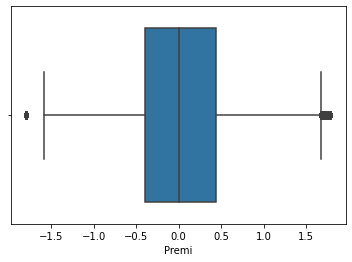

In [ ]:
sns.boxplot(data_scale['Premi'])

In [ ]:
data_scale = data_scale.drop(['Tertarik'],axis=1)

In [ ]:
data_scale

,Jenis_Kelamin,SIM,Kode_Daerah,Umur_Kendaraan,Kendaraan_Rusak,Premi,Lama_Berlangganan
0,1.074080,0.046101,0.513633,0.822436,0.999949,-0.230725,-0.699155
1,-0.931029,0.046101,0.977639,2.560784,-1.000051,-0.368249,0.044768
2,1.074080,0.046101,1.518980,0.822436,0.999949,0.059501,-0.430855
3,1.074080,0.046101,1.673649,-0.915912,0.999949,-1.797786,-1.113801
4,-0.931029,0.046101,0.668302,2.560784,-1.000051,0.190547,0.483804
...,...,...,...,...,...,...,...
274891,1.074080,0.046101,-1.729065,0.822436,0.999949,-0.356650,0.764300
274892,1.074080,0.046101,1.518980,0.822436,0.999949,0.796974,-1.272342
274893,1.074080,0.046101,1.828318,0.822436,0.999949,1.109473,0.874059
274894,-0.931029,0.046101,-1.497062,-0.915912,0.999949,-0.078085,1.410659


In [ ]:
# data_scale.to_csv("/content/drive/MyDrive/Kuliah/Semester 6/ML_Malin_Machine Learning/Tugas/Tubes 1/kendaraan/kendaraan_train_scaled.csv", index=False)

# Data Split

In [ ]:
data_scale = pd.read_csv("/content/drive/MyDrive/Kuliah/Semester 6/ML_Malin_Machine Learning/Tugas/Tubes 1/kendaraan/kendaraan_train_scaled.csv")

In [ ]:
from sklearn.model_selection import train_test_split #Import library untuk melakukan data split
X_train, X_test, y_train, y_test = train_test_split(data_scale, label, test_size = 0.20, random_state = 42)

# KNN

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=30, metric='euclidean')  #KN menggunakan euclidian distance

In [ ]:
classifier.fit(X_train, y_train)#Melatih data train yang telah di split


KNeighborsClassifier(metric='euclidean', n_neighbors=30)

In [ ]:
y_pred = classifier.predict(X_test)#Predict menggunakan data test

In [ ]:
print(accuracy_score(y_test,y_pred)) #Print Akurasi

0.8763259492484726


# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier #Menggunakan model random forest

In [ ]:
#Melakukan klasifikasi random forest
classifier_rf = RandomForestClassifier(bootstrap=True, max_depth=50, max_features='auto', n_estimators=1200, min_samples_split=5, min_samples_leaf=4) 


In [ ]:
classifier_rf.fit(X_train, y_train) #Melatih data train yang sudah di split

RandomForestClassifier(max_depth=50, min_samples_leaf=4, min_samples_split=5,
                       n_estimators=1200)

In [ ]:
y_pred_rf = classifier_rf.predict(X_test) #Predict menggunakan data test

In [ ]:
print(accuracy_score(y_test,y_pred_rf)) #Print Akurasi

0.8749390906705649


# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB #Menggunakan model naive bayes

In [ ]:
classifier_gb = GaussianNB()
classifier_gb.fit(X_train, y_train)#Melatih data train yang telah di split

GaussianNB()

In [ ]:
y_pred_gb = classifier_gb.predict(X_test)#Prediksi menggunakan data test

In [ ]:
print(accuracy_score(y_test,y_pred_gb)) #Print Akurasi

0.6946474755425616


# DecisionTre Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
classifier_tree = DecisionTreeClassifier()

In [ ]:
classifier_tree.fit(X_train, y_train)#Melatih data train yang telah di split

DecisionTreeClassifier()

In [ ]:
y_pred_tree = classifier_gb.predict(X_test)#Prediksi menggunakan data test

In [ ]:
print(accuracy_score(y_test,y_pred_tree)) #Print Akurasi

0.6946474755425616


# Data Test

In [ ]:
data_test = pd.read_csv("/content/drive/MyDrive/Kuliah/Semester 6/ML_Malin_Machine Learning/Tugas/Tubes 1/kendaraan/kendaraan_test.csv")

In [ ]:
data_test

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,49,1,8,0,1-2 Tahun,Pernah,46963,26,145,0
1,Pria,22,1,47,1,< 1 Tahun,Tidak,39624,152,241,0
2,Pria,24,1,28,1,< 1 Tahun,Tidak,110479,152,62,0
3,Pria,46,1,8,1,1-2 Tahun,Tidak,36266,124,34,0
4,Pria,35,1,23,0,1-2 Tahun,Pernah,26963,152,229,0
...,...,...,...,...,...,...,...,...,...,...,...
47634,Pria,61,1,46,0,> 2 Tahun,Pernah,31039,124,67,0
47635,Pria,41,1,15,0,1-2 Tahun,Pernah,2630,157,232,0
47636,Pria,24,1,29,1,< 1 Tahun,Tidak,33101,152,211,0
47637,Pria,59,1,30,0,1-2 Tahun,Pernah,37788,26,239,1


In [ ]:
label_t = data_test.iloc[:, -1]
fitur_encode = ["Jenis_Kelamin", "Umur_Kendaraan", "Kendaraan_Rusak"]#Pilih fitur yang akan digunakan
labelencoder = LabelEncoder()

# Menggunakan label encoder kepada fitur yang sudah dipilih
data_test[fitur_encode] = data_test[fitur_encode].apply(lambda series: pd.Series(
    labelencoder.fit_transform(series[series.notnull()]),
    index = series[series.notnull()].index
  ))


In [ ]:
data_test

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,49,1,8,0,0,0,46963,26,145,0
1,0,22,1,47,1,1,1,39624,152,241,0
2,0,24,1,28,1,1,1,110479,152,62,0
3,0,46,1,8,1,0,1,36266,124,34,0
4,0,35,1,23,0,0,0,26963,152,229,0
...,...,...,...,...,...,...,...,...,...,...,...
47634,0,61,1,46,0,2,0,31039,124,67,0
47635,0,41,1,15,0,0,0,2630,157,232,0
47636,0,24,1,29,1,1,1,33101,152,211,0
47637,0,59,1,30,0,0,0,37788,26,239,1


In [ ]:
data_test.drop(['Tertarik'], axis=1, inplace=True)#Drop fitur yang tidak akan dinormalisasi

std = StandardScaler()
data_scale_t = pd.DataFrame(std.fit_transform(data_test), columns=data_test.columns)#Normalisasi data menggunakan standard scaler

data_scale_t = pd.concat([data_scale_t, label_t], axis=1)#HAPUS TIW GAGUNA

In [ ]:
data_scale_t.drop(['Tertarik'], axis=1, inplace=True)
data_scale_t.drop(dropped, axis=1, inplace=True)

In [ ]:
data_scale_t

,Jenis_Kelamin,SIM,Kode_Daerah,Umur_Kendaraan,Kendaraan_Rusak,Premi,Lama_Berlangganan
0,1.090132,0.045634,-1.387362,-0.897003,-0.990744,0.938632,-0.112954
1,-0.917320,0.045634,1.564228,0.836278,1.009343,0.516962,1.034805
2,-0.917320,0.045634,0.126274,0.836278,1.009343,4.588010,-1.105287
3,-0.917320,0.045634,-1.387362,-0.897003,1.009343,0.324024,-1.440050
4,-0.917320,0.045634,-0.252135,-0.897003,-0.990744,-0.210489,0.891336
...,...,...,...,...,...,...,...
47634,-0.917320,0.045634,1.488547,2.569559,-0.990744,0.023702,-1.045508
47635,-0.917320,0.045634,-0.857589,-0.897003,-0.990744,-1.608567,0.927203
47636,-0.917320,0.045634,0.201956,0.836278,1.009343,0.142176,0.676131
47637,-0.917320,0.045634,0.277638,-0.897003,-0.990744,0.411473,1.010894


In [ ]:
# KNN
y_pred = classifier.predict(data_scale_t)#Prediksi menggunakan data test

print("Akurasi Data Test")

print(accuracy_score(label_t, y_pred))#Lakukan perhitungan performansi terhadap data prediksi serta data test

Akurasi Data Test
0.8761518923571023


In [ ]:
# Random Forest
y_pred_rf = classifier_rf.predict(data_scale_t)#Prediksi menggunakan data test

print("Akurasi Data Test")

print(accuracy_score(label_t, y_pred_rf))#Lakukan perhitungan performansi terhadap data prediksi serta data test

Akurasi Data Test
0.8761518923571023


In [ ]:
# Naive Bayes
y_pred_nb = classifier_gb.predict(data_scale_t)#Prediksi menggunakan data test

print("Akurasi Data Test")

print(accuracy_score(label_t, y_pred_nb))#Lakukan perhitungan performansi terhadap data prediksi serta data test

Akurasi Data Test
0.6883855664476585


In [ ]:
# Decision Tree
y_pred_tree = classifier_tree.predict(data_scale_t)#Prediksi menggunakan data test

print("Akurasi Data Test")

print(accuracy_score(label_t, y_pred_tree))#Lakukan perhitungan performansi terhadap data prediksi serta data test

Akurasi Data Test
0.80238879909318
